In [80]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read in the data to a pandas DataFrame using the read_csv method.

train=pd.read_excel('Normalized_relative_quantities.xlsx')

#train

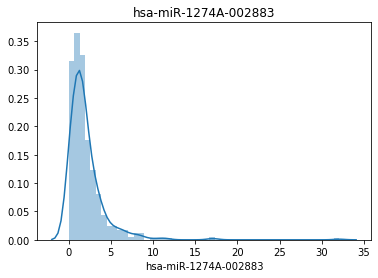

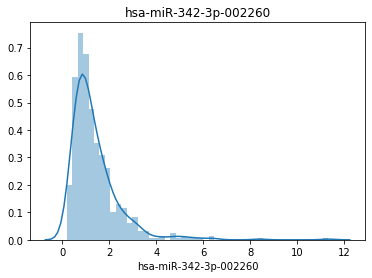

In [2]:
#Let's plot two random columns to see the distribution
plt.clf()
sns.distplot(train['hsa-miR-1274A-002883'])
plt.title('hsa-miR-1274A-002883')
plt.show()

plt.clf()
sns.distplot(train['hsa-miR-342-3p-002260'])
plt.title('hsa-miR-342-3p-002260')
plt.show()

#Here we confirm that the miRNAs follow the "normal" negative binomial distribution for gene expression data 

In [81]:
#Let's see again how many missing data there are / column
train.isna().sum()

CardID                      0
inc_dm_2009                 7
inc_cv_2009                 7
hsa-miR-1274A-002883        0
hsa-miR-17-002308           0
hsa-miR-1243-002854       249
hsa-miR-1274B-002884        1
hsa-miR-625*-002432        48
hsa-miR-223-002295          0
hsa-miR-126-002228          0
hsa-miR-484-001821          0
hsa-miR-320-002277          0
hsa-miR-191-002299          0
hsa-miR-106a-002169         0
hsa-let-7b-002619          10
mmu-miR-451-001141         30
hsa-miR-342-3p-002260       0
hsa-miR-338-5P-002658       0
hsa-let-7e-002406           3
hsa-miR-486-001278          0
hsa-miR-28-3p-002446      192
hsa-miR-222-002276          1
hsa-miR-483-5p-002338       0
hsa-miR-122-002245        144
hsa-miR-146b-001097         9
hsa-miR-20b-001014         39
hsa-miR-574-3p-002349       0
hsa-miR-186-002285         38
hsa-miR-145-002278         70
hsa-miR-125a-5p-002198    376
hsa-let-7d-002283          87
hsa-miR-146a-000468         0
hsa-miR-92a-000431          1
hsa-miR-24

In [82]:
#As we see we have 7 individuals with no prediction over if they are going to develop dm or cm ("inc_dm_2009", "inc_cv_2009"), 
#so we need to remove them from the downstream analysis 

train = train.dropna(how='any', subset=['inc_dm_2009', 'inc_cv_2009'])

#we are also going to remove sample ids labels
train = train.drop('CardID', 1)

train.shape

(553, 49)

In [127]:
#Our feature varuables (all numerical) start from the 3rd column
X = train.iloc[:,3:]

#Our target variable is the "inc_dm_2009" or "inc_cv_2009" column
y = train['inc_dm_2009']
#we can convert it to integer 
y = y.astype(int)


In [128]:
#Before any pre-processing we should split the data!

#Now split the data into training and testing before pre-processing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print(X_train.shape)
#print(X_test.shape)




#Maybe later trying to scale down the healthy subset to the levels of the two 

In [131]:
y_test

88     0
136    0
99     1
110    0
144    1
      ..
62     0
6      0
8      1
367    1
285    0
Name: inc_dm_2009, Length: 166, dtype: int64

In [104]:
#A large amount of the total data is missing in some cases, with columns missing even 80% of the data ("hsa-miR-25-000403").

#The chosen imputation methods did not work well with data that follow the negative bionomial distribution so as to impute and
#log-transform and scale later --- so I will log normalise first, impute and then scale



In [185]:
#Let's log-transform miRNA values to follow the normal distribution
X_train_log = np.log2(X_train)

X_test_log = np.log2(X_test)

In [186]:
X_train_log

,hsa-miR-17-002308,hsa-miR-1243-002854,hsa-miR-1274B-002884,hsa-miR-625*-002432,hsa-miR-223-002295,hsa-miR-126-002228,hsa-miR-484-001821,hsa-miR-320-002277,hsa-miR-191-002299,hsa-miR-106a-002169,...,hsa-miR-21-000397,hsa-miR-30b-000602,hsa-miR-26a-000405,hsa-miR-142-3p-000464,hsa-miR-331-000545,hsa-miR-25-000403,hsa-miR-335-000546,hsa-miR-374-000563,hsa-miR-139-5p-002289,hsa-miR-720-002895
318,-0.159000,NaN,4.216002,NaN,4.023000,-2.056000,-3.009001,0.538000,0.735001,0.159000,...,0.372000,0.725000,NaN,-6.824999,-1.613001,NaN,-1.716997,NaN,1.792999,1.536001
454,-0.252001,-25.857000,1.498000,-1.274002,-10.100001,-0.312000,-2.650002,-2.018000,-0.725000,0.252001,...,-1.144001,0.660999,-0.144001,-2.209000,NaN,NaN,NaN,NaN,-1.404001,-0.167999
494,-0.025001,-26.096000,1.002999,NaN,-7.874001,0.162000,-2.620002,-3.158000,0.024999,0.025001,...,-0.889001,1.336999,1.578998,0.327001,NaN,-20.016003,NaN,-1.766999,0.416999,0.045999
210,-0.366000,NaN,-2.822999,-1.245002,-8.750000,-1.821000,-2.628001,-1.905000,-2.050000,0.366000,...,-0.479001,-0.759000,-2.164001,-0.884999,-2.810000,NaN,-0.849000,NaN,-3.036002,-2.484000
38,-0.322001,NaN,1.265999,0.024998,-7.562001,0.778000,-0.699001,0.381998,0.653997,0.322001,...,-0.847002,0.976000,-0.597002,-0.159000,NaN,NaN,0.214001,NaN,0.103998,0.911999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.006001,-15.737999,-0.968998,0.142000,-9.881999,0.539001,-2.056000,-1.247000,0.731001,0.006001,...,-1.104000,0.736002,0.702000,-1.110998,-1.209999,NaN,-0.072998,-2.263998,0.118000,-0.438999
281,-0.104000,NaN,-2.535000,NaN,-1.346999,-2.230999,-2.475000,-1.483999,-1.205000,0.104000,...,-1.212999,-1.490000,-1.165001,-4.117998,NaN,NaN,-3.448999,NaN,-2.468000,-1.650000
9,0.116000,NaN,-0.443000,0.188001,-7.362001,-0.266000,-0.987000,0.798999,0.084998,-0.116000,...,0.340999,0.603000,1.110000,-1.738000,NaN,NaN,-0.826001,-0.661998,-0.556001,-0.116000
365,0.310999,NaN,3.837000,3.025000,-7.014001,2.244999,0.025000,1.032999,0.910999,-0.310999,...,1.868999,3.070000,1.709999,1.762001,NaN,NaN,NaN,NaN,-0.996002,2.007000


In [182]:
#Imputation - Different methods will be tested

#First I will try two imputation methods: Univariate and Multivariate feature imputation on the entire dataset
#Then I will remove columns with over 50% missing values and then impute with the same two methods

#Univariate feature imputation using mean
#from sklearn.impute import SimpleImputer
#imp_un = SimpleImputer(missing_values=np.nan, strategy='mean')

#X_train_imp = imp_un.fit_transform(X_train_log)
#X_test_imp = imp_un.fit_transform(X_test_log)



#Multivariate feature imputation
#import numpy as np
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp_mv = IterativeImputer(max_iter=10, random_state=0)

#X_train_imp = imp_mv.fit_transform(X_train_log)
#X_test_imp = imp_mv.fit_transform(X_test_log)
#X_imp = imp_mv.transform(X)

#X_imp
#Remove columns with missing data

/home/alexandros/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [193]:
#remove columns with missing data < 50% and then impute

#find columns with < 50% missing values 
cols = X_train_log.columns[X_train_log.isnull().mean() < 0.5]

#set sets with those columns
X_train_log = X_train_log[cols]
X_test_log = X_test_log[cols]


#Univariate feature imputation using mean
from sklearn.impute import SimpleImputer
imp_un = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imp = imp_un.fit_transform(X_train_log)
X_test_imp = imp_un.fit_transform(X_test_log)

In [195]:
#Now let's try to set our numerical variables to -1 +1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

X_train_sc = scaler.fit_transform(X_train_imp)
X_test_sc = scaler.transform(X_test_imp) #Here we only need to fit the test data

In [196]:
#SVM model

from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7108433734939759


In [173]:
#Try grid search
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel':['linear'],'C':[2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5]}, 
              {'kernel':['rbf'],'C':[2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5]}, 'gamma': ['rbf']]
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.03125, 0.125, 0.5, 2, 8, 32],
                          'kernel': ['linear']},
                         {'C': [0.03125, 0.125, 0.5, 2, 8, 32],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [199]:
#Try grid search with cleaner code
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train_sc, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

SVC()

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.72


In [174]:
accuracy = clf.best_score_

In [175]:
accuracy

0.7235431235431236

In [ ]:
#We will try:
#SVM
#General discriminant analysis
#Decision Trees
#Random Forest
#GLMs (generalized linear models) -- logistic regression tried in paper


In [ ]:
#feature selection before SVM (PCA?)

In [ ]:
#first log values, then scale -1,1 or 0,1 ## one hot encoding for the categorical variables 